In [1]:
import pandas as pd
import numpy as np

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);






|nº| Atributo            | SI | Observação |
|---|---------------------|----|------------|
|01.| __Acidez fixa:__ | (g/dm³)| Formado pela acidez orgânica da uva (tartático) e da fermentação alcoólica.| 
|02.| __Acidez volátil:__ | (g/dm³) | Produzidos pelas reações químicas durante a maturação do vinho (Ácido Acético). A acidez volátil é um indicador da qualidade do vinho.| 
|03.| __Ácido cítrico:__ | (g/dm³) | Um dos ácidos orgânicos da uva.| 
|04.| __Açúcar residual:__ | (g/dm³)  | - | 
|05.| __Cloretos:__ | (g/dm³) | Cloreto de sódio | 
|06.| __Dióxido de enxofre livre:__  | (mg/dm³) | - | 
|07.| __Dióxido de enxofre total:__  | (mg/dm³) | - | 
|08.| __Densidade:__  | (g/cm³) | - | 
|09.| __pH:__ | [0,14] | - | 
|10.| __Sulfatos:__ | (g/dm³) | Sulfato de potássio | 
|11.| __Álcool:__ | - | - | 
|12.| __Qualidade:__ | (vol.%) | - |







### Vinho Branco

In [2]:
#Load Dataset
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
#Count from a column to show the quantity once
print("Quantidade amostra = ",df_white['quality'].count())
#Show the first 10 lines
df_white.head(n=10)

Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
#Display statistic with only 2 decimal digits
pd.options.display.float_format = "{:.2f}".format
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


Text(0, 0.5, 'Frequência')

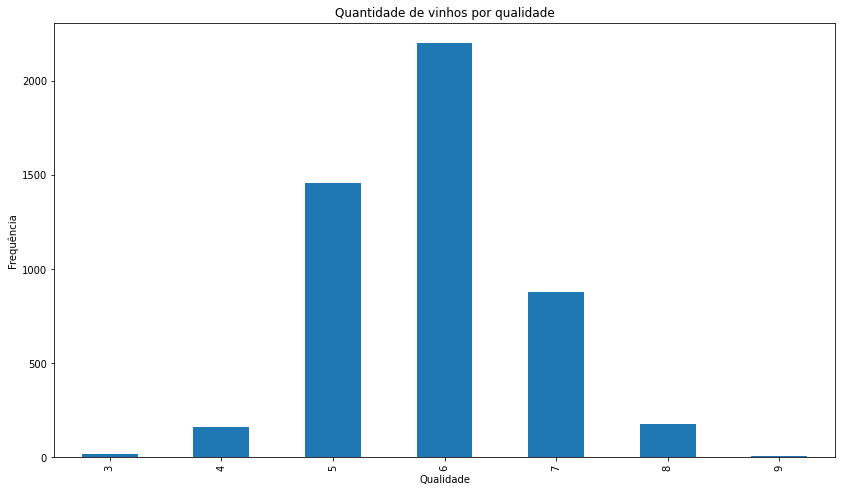

In [4]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [0,1,2,3,4,5,6,7,8,9,10],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## Treinamento

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df_white.iloc[:,:11]
y = df_white['quality']#target
#Split into test and train with 25% samples in test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
#Range the depth of the tree (un-pruned and pruned)
k_range = [None,2,3,4,5,6,7,8,9,10]
dtc_list_predict = []
for k in k_range :
    dtc = DecisionTreeClassifier(max_depth = k,random_state = 1 )
    dtc.fit(X_train,y_train)
    #Armazena em um array para as predições
    dtc_list_predict.append(dtc.predict(X_test))

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)

**n_estimators: Number of trees in the forest

**max_depth: If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

**min_samples_split: The minimum number of samples required to split an internal node

**min_samples_leaf: The minimum number of samples required to be at a leaf node

**max_features: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**n_jobs: the number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

**max_samples:If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [8]:
from sklearn.ensemble import RandomForestClassifier
#Range the number of trees in the forest
k_range = [100,200,300,400,500,600,700,800,900,1000]
#Create a list of predictions for each number of trees in the forest
rfc_list_predict = []
for k in k_range:
    rfc = RandomForestClassifier(n_estimators= k,n_jobs = -1,random_state = 1 )
    rfc.fit(X_train,y_train)
    rfc_list_predict.append(rfc.predict(X_test))

## Avaliação

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
metrics = [[[],[],[],[]], [[],[],[],[]]]

## METRICS
**average: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} default=’binary’
    *** 'weighted':Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

**zero_division:“warn”, 0 or 1, default=”warn”
    ***Sets the value to return when there is a zero division. If set to “warn”, this acts as 0, but warnings are also raised.
    

### Decision Tree

In [10]:
for i in range(0,len(dtc_list_predict)):
    metrics[0][0].append(accuracy_score(y_test, dtc_list_predict[i]))
    metrics[0][1].append(precision_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][2].append(recall_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][3].append(f1_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))


### Random Forest

In [11]:
for i in range(0,len(rfc_list_predict)):
    metrics[1][0].append(accuracy_score(y_test, rfc_list_predict[i]))
    metrics[1][1].append(precision_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][2].append(recall_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][3].append(f1_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))


### Plot

In [12]:
import matplotlib.pyplot as plt 
labels = ["Decision Tree", "Random Forest"]
metric = ["Acurácia", "Precisão", "Recall", "F1"]
#Start the matrices with mininum and max values
max_metrics = [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
min_metrics = [[2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0]]

for i in range(len(labels)):
    for l in range(0,len(rfc_list_predict)): #10 predictions for each classifier
        for k in range(0,4): # find the maximum and minimum values for each metric and classifier
            if (max_metrics[i][k] < metrics[i][k][l]):
                max_metrics[i][k] = metrics[i][k][l]
            if (min_metrics[i][k] > metrics[i][k][l]):
                min_metrics[i][k] = metrics[i][k][l]
#Print results
for i in range(len(labels)):
    for k in range(0,4):
        print("Matriz de confusão do", labels[i], "com a(o) maior(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(max_metrics[i][k])])
        print(rfc_conf_matrix)
        print("Matriz de confusão do", labels[i], "com a(o) menor(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(min_metrics[i][k])])
        print(rfc_conf_matrix)

Matriz de confusão do Decision Tree com a(o) maior(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Decision Tree com a(o) menor(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   7  20  10   0   0]
 [  0   4 243 120   1   0]
 [  0   0  76 436  32   0]
 [  0   0   5  97 129   2]
 [  0   0   1  15  12  13]]
Matriz de confusão do Decision Tree com a(o) maior(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Decision Tree com a(o) menor(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   7  20  10   0   0]
 [  0   4 240 122   2   0]
 [  0   0  72 440  32   0]
 [  0   0   5  96 130   2]
 [  0   0   1  13  13  14]]
Matriz de confusão do Decision Tree com a(o) maior(o)  Recall
[[  0   0   1   1   0   0]
 [ 

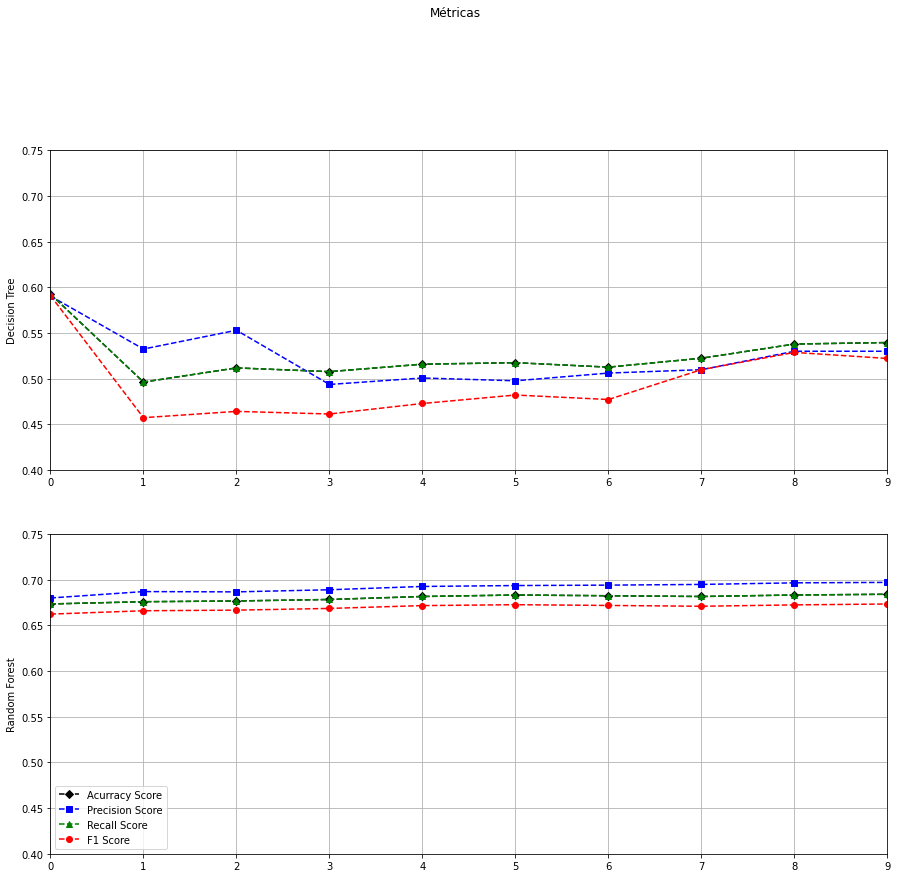

In [13]:
#Plot the metrics in a graph
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 20]

for i in range(len(labels)):
    plt.subplot(311+i)
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][0], 'kD--', label = "Acurracy Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][1], 'bs--', label = "Precision Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][2], 'g^--', label = "Recall Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][3], 'ro--', label = "F1 Score")
    plt.axis([0, len(k_range)-1, 0.4, 0.75])
    plt.ylabel(labels[i])
    plt.grid("on")
plt.legend()
plt.suptitle("Métricas")
plt.show()

## GridSearchCV
> class sklearn.model_selection.GridSearchCV(**estimator**, **param_grid**, **scoring**=None, **n_jobs**=None, **iid**='deprecated', **refit**=True, **cv**=None, **verbose**=0, **pre_dispatch**='2 * n_jobs', **error_score**=nan, **return_train_score**=False)

In [14]:
#GridSearch is used to tune the hyper-parameters for the classifier
#Take time - around 50 minutes
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [80,95,110],
    'max_features': [ 3, 5],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100,200,300,500,800,1000] #number of forests
}
rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X_train, y_train)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Melhores parametros = 
 {'criterion': 'entropy', 'max_depth': 95, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

Melhor pontuação: 
 0.6321777599928861


In [15]:
feature_importantes = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)

                      importance
alcohol                     0.16
volatile acidity            0.11
free sulfur dioxide         0.10
density                     0.10
pH                          0.08
total sulfur dioxide        0.08
residual sugar              0.08
chlorides                   0.08
citric acid                 0.07
fixed acidity               0.07
sulphates                   0.07
